In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Re = 1000
Mx = 32
n = 5500

u = pd.read_csv(f"Re_{Re}_{Mx}/u_{n}.csv", header=None)
v = pd.read_csv(f"Re_{Re}_{Mx}/v_{n}.csv", header=None)

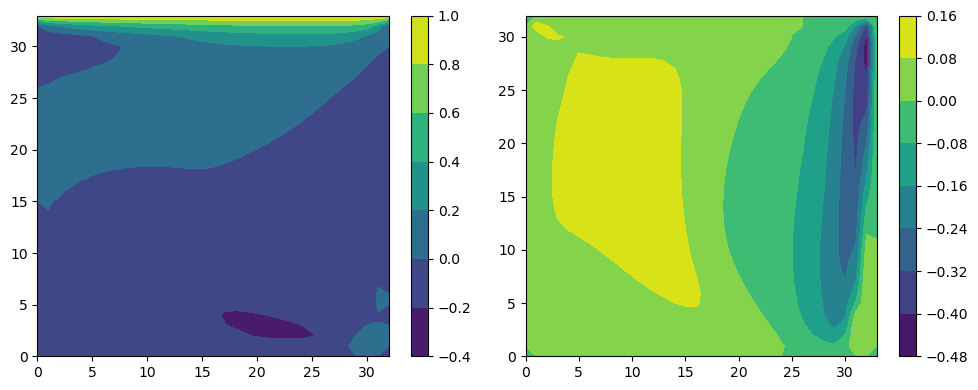

In [3]:
plt.figure(figsize=(10, 4))  # 전체 그림 크기 설정

plt.subplot(1, 2, 1)
plt.contourf(u)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(v)
plt.colorbar()

plt.tight_layout()

plt.show()

(0.0, 1.0)

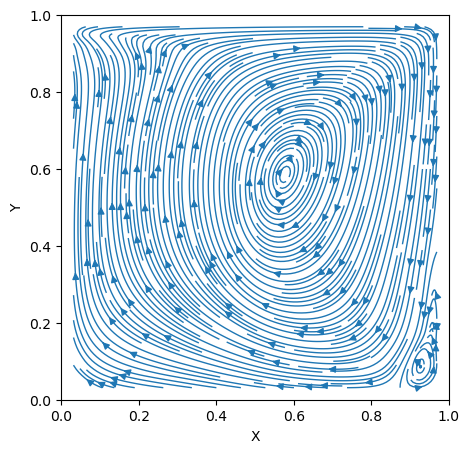

In [4]:
file_name = "RE_1000_32"
n = 4300
# CFD 결과 데이터 불러오기 (CSV 또는 Numpy 배열)
U = np.loadtxt(f"{file_name}/u_{n}.csv", delimiter=",")[1:-1, :]
V = np.loadtxt(f"{file_name}/v_{n}.csv", delimiter=",")[:, 1:-1]

U = (( U[:, 1:] + U[:, :-1] )/2)
V = (( V[1:, :] + V[:-1, :] )/2)
speed = np.sqrt(U**2 + V**2)

# CFD 격자 좌표 생성
Nx, Ny = U.shape
dx = 1/Nx
grid = np.linspace(dx, 1-dx, Nx)
X, Y = np.meshgrid(grid, grid)

plt.figure(figsize=(5, 5))
# Streamlines 플롯
plt.streamplot(X, Y, U, V, density=3, 
               linewidth= 1, #3*speed / speed.max(), 
               arrowsize=1, 
               cmap="jet")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(0, 1)
plt.ylim(0, 1)

# plt.quiver(X, Y, U, V, 
#            angles='xy', 
#            scale_units='xy', 
#            scale=1,        # 크기 스케일 조절
#            cmap='jet')

